# 查看数据情况

类别：[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]
训练集的数据量：10000


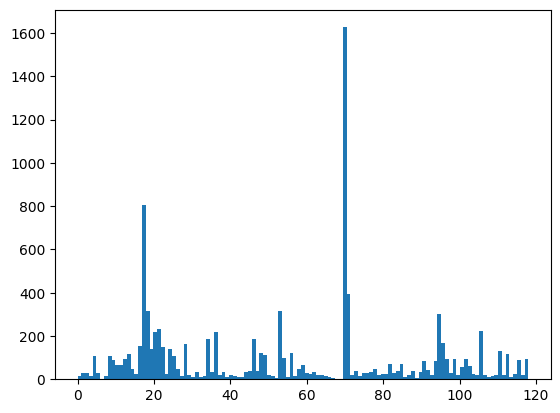

In [26]:
with open('trains.json', 'r',encoding='utf-8') as f:
    trains = json.load(f)

labels = []
sents = []
for sent in trains:
    labels.append(int(sent['label']))
    sents.append(sent['sentence'])
 
print(f'类别：{sorted(set(labels))}')
print(f'训练集的数据量：{len(labels)}')
import matplotlib.pyplot as plt
plt.hist(np.array(labels),bins=119)
plt.show()

共有119个类：0-118，类别分布不均匀

# 划分训练集和验证集

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
with open('trains.json', 'r',encoding='utf-8') as f:
    trains = json.load(f)

In [4]:
X_train, X_validate = train_test_split(trains, test_size = 0.2, random_state = 42)

In [23]:
with open('./data/trains.json', 'w', encoding='utf-8') as json_file:
    json.dump(X_train, json_file, ensure_ascii=False, indent=4)

In [24]:
with open('./data/validates.json', 'w', encoding='utf-8') as json_file:
    json.dump(X_validate, json_file, ensure_ascii=False, indent=4)

119个类别:0-118

# 分词

In [11]:
import jieba
import json

with open('trains.json', 'r',encoding='utf-8') as f:
    trains = json.load(f)
    
trains_data = [] #[[第一个句子的分词结果],[第二个句子的分词结果],...]
for sent in trains:
    fenci = jieba.cut(sent['sentence'],cut_all=False)
    res=[]
    for j in fenci:
        res.append(j)
    trains_data.append(res)

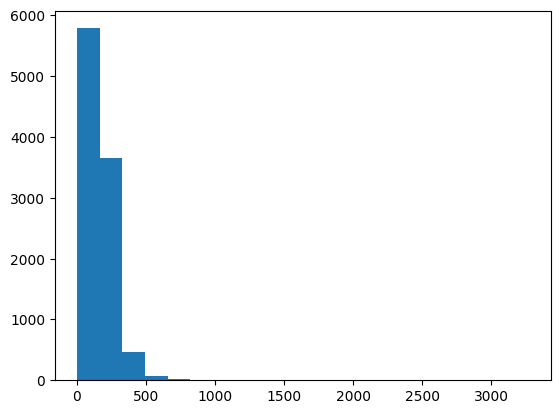

336.0
489.0100000000002


In [23]:
sents_len = []
for sent in trains_data:
    sents_len.append(len(sent))
    
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.array(sents_len),bins=20)
plt.show() #大部分句子长度小于500

print(np.percentile(sents_len, 95))
print(np.percentile(sents_len, 99))

## 只获取前512个词的分词完整代码

In [27]:
import jieba
import json

# 10000条训练数据
with open('trains.json', 'r',encoding='utf-8') as f:
    trains = json.load(f)

train_data = [] #[[第一个句子的分词结果],[第二个句子的分词结果],...]
for sent in trains:
    sentence = sent['sentence'] if len(sent['sentence'])<=512 else sent['sentence'][:512]  #保证句子长度小于等于512
    fenci = jieba.cut(sentence,cut_all=False)
    res=[]
    for j in fenci:
        res.append(j)
    train_data.append(res)


# 1425条测试数据
with open('tests.json', 'r',encoding='utf-8') as f:
    tests = json.load(f)

test_data = [] #[[第一个句子的分词结果],[第二个句子的分词结果],...]
for sent in tests:
    sentence = sent['sentence'] if len(sent['sentence'])<=512 else sent['sentence'][:512]
    fenci = jieba.cut(sentence,cut_all=False)
    res=[]
    for j in fenci:
        res.append(j)
    test_data.append(res)  

# 建立词表

In [28]:
import torch
from vocab import Vocab
vocab = Vocab.build(train_data+test_data)
for i,sent in enumerate(trains):
    train_data[i] = (vocab.convert_tokens_to_ids(train_data[i]), int(sent['label']))

for i,sent in enumerate(tests):
    test_data[i] = (vocab.convert_tokens_to_ids(test_data[i]), int(sent['label']))

In [29]:
len(vocab.token_to_idx) #词表的大小

72587

In [30]:
print(train_data[0])

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 2, 3, 13, 14, 15, 16, 17, 18, 19, 5, 6, 7, 20, 21, 22, 23, 24, 25, 26, 13, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 13, 38, 39, 40, 41, 42, 11, 43, 44, 45, 46, 47, 48, 49, 12, 50, 51, 52, 13, 53, 35, 50, 54, 55, 56, 57, 58, 12, 7, 20, 22, 40, 59, 12, 60, 47, 61, 62, 59, 63, 64, 65, 66, 13, 67, 47, 68, 69, 70, 71, 22, 72, 50, 35, 47, 49, 73, 13, 11, 74, 75, 15, 40, 65, 76, 40, 65, 77, 40, 58, 78, 49, 79, 13, 80, 81, 39, 82, 77, 83, 22, 84, 85, 86, 13, 11, 87, 88, 89, 90, 91, 92, 93, 3, 22, 94, 40, 95, 96, 97, 98, 12, 99, 22, 50, 49, 13, 100, 29, 44, 101, 102, 90, 103, 104, 50, 35, 4, 7, 53, 35, 54, 55, 7, 20, 51, 105, 106, 107, 13, 108, 109, 40, 110, 111, 112, 49, 79, 15, 40, 65, 76, 40, 65, 113, 40, 114, 115, 49, 79, 116, 117, 41, 118, 13, 11, 119, 120, 4, 15, 121, 119, 122, 15, 123, 124, 11, 13, 125, 126, 121, 127, 13, 128, 82, 7, 20, 62, 129, 130, 131, 132, 133, 12, 119, 39, 62, 13, 129, 13, 134, 135, 63, 136, 62, 13, 61, 59, 137, 138, 139,

In [24]:
# %run utils.py
# train_data, test_data, vocab = load_sentence()

# MLP

## 创建数据集

In [32]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict
from vocab import Vocab
from utils import load_sentence

In [33]:
class BowDataset(Dataset):
    def __init__(self, data): #data为原始的数据
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        return self.data[i]

In [34]:
#%run utils.py
#train_data, test_data, vocab = load_sentence()
train_dataset = BowDataset(train_data) #BowDataset是Dataset的子类
test_dataset = BowDataset(test_data)

In [35]:
def collate_fn(examples):
    # 从独立样本集合中构建各批次的输入输出
    # 其中，BowDatasete类定义了一个样本的数据结构，即输入标签和输出标签的元组
    # 因此，将输入inputs定义为一个张量的列表，其中每个张量为原始句子中标记序列对应的索引值序列ex[0]
    inputs = [torch.tensor(ex[0]) for ex in examples]
    # 输出目标targets为该批次中全部样例输出结果（0或1）构成的张量
    targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
    offsets = [0] + [i.shape[0] for i in inputs]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)  #获取一个批次中每个序列的偏移量
    inputs = torch.cat(inputs)
    return inputs, offsets, targets

In [36]:
batch_size = 32
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn, shuffle=False)

## 模型

In [37]:
class MLP(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_class):
        super(MLP, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, hidden_dim)
        self.activate = F.relu
        self.linear2 = nn.Linear(hidden_dim, num_class)
    def forward(self, inputs, offsets):
        embedding = self.embedding(inputs, offsets)
        hidden = self.activate(self.linear1(embedding))
        outputs = self.linear2(hidden)
        log_probs = F.log_softmax(outputs, dim=1)
        return log_probs

In [38]:
from tqdm import *

# 超参数设置
embedding_dim = 128
hidden_dim = 256
num_class = 119
batch_size = 32
num_epoch = 5

# 加载模型
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = MLP(len(vocab), embedding_dim, hidden_dim, num_class)
model.to(device) # 将模型加载到CPU或GPU设备

MLP(
  (embedding): EmbeddingBag(72587, 128, mode=mean)
  (linear1): Linear(in_features=128, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=119, bias=True)
)

In [39]:
#训练过程
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # 使用Adam优化器

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch}"):
        inputs, offsets, targets = [x.to(device) for x in batch]
        #inputs, offsets, targets = [x for x in batch]
        log_probs = model(inputs, offsets)
        #print(log_probs)
        #print(targets)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

Training Epoch 0: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:29<00:00, 10.71it/s]


Loss: 1166.87


Training Epoch 1: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:24<00:00, 13.02it/s]


Loss: 892.86


Training Epoch 2: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:24<00:00, 13.01it/s]


Loss: 713.25


Training Epoch 3: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:24<00:00, 12.94it/s]


Loss: 582.00


Training Epoch 4: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:24<00:00, 12.95it/s]

Loss: 476.12


In [40]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
# 测试过程
acc = 0
y_pred = np.array([]).astype(int)  #存储真实的target
y_true = np.array([]).astype(int)  #存储预测出来的target
for batch in tqdm(test_data_loader, desc=f"Testing"):
    inputs, offsets, targets = [x.to(device) for x in batch]
    #inputs, offsets, targets = [x for x in batch]
    with torch.no_grad():
        output = model(inputs, offsets)
        y_pred = np.append(y_pred,output.argmax(dim=1).cpu().numpy()) #要先把数据放在cpu上，才能转成numpy
        y_true = np.append(y_true,targets.cpu().numpy())
        acc += (output.argmax(dim=1) == targets).sum().item()

# 输出在测试集上的准确率
print(f"Acc: {acc / len(test_data_loader):.2f}")
print(f"f1_macro:{f1_score(y_true,y_pred,average='macro'):.2f}")
print(f"f1_weighted:{f1_score(y_true,y_pred,average='weighted'):.2f}")
print(f"f1_macro:{f1_score(y_true,y_pred,average='macro'):.2f}")

Testing: 100%|████████████████████████████████████████████████████████████████████| 1425/1425 [00:02<00:00, 635.36it/s]

Acc: 0.46
f1_macro:0.22
f1_weighted:0.43
f1_macro:0.22


# CNN

## 创建数据集

In [16]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import defaultdict
from vocab import Vocab
from utils import load_sentence

In [17]:
class CnnDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        return self.data[i]

def collate_fn(examples):
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
    # 对batch内的样本进行padding，使其具有相同长度
    inputs = pad_sequence(inputs, batch_first=True)
    return inputs, targets

In [18]:
#加载数据
#%run utils.py
#train_data, test_data, vocab = load_sentence() #MLP模型已经运行过了
train_dataset = CnnDataset(train_data)
test_dataset = CnnDataset(test_data)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn, shuffle=False)

## 模型

In [19]:
#tqdm是一个Pyth模块，能以进度条的方式显示迭代的进度
from tqdm.auto import tqdm

#超参数设置
embedding_dim = 128
hidden_dim = 256
num_class = 119
batch_size = 32
num_epoch = 5
filter_size = 3
num_filter = 100

In [20]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, filter_size, num_filter, num_class):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1d = nn.Conv1d(embedding_dim, num_filter, filter_size, padding=1)
        self.activate = F.relu
        self.linear = nn.Linear(num_filter, num_class)
    def forward(self, inputs):
        embedding = self.embedding(inputs)
        convolution = self.activate(self.conv1d(embedding.permute(0, 2, 1))) #permute维度交换
        pooling = F.max_pool1d(convolution, kernel_size=convolution.shape[2])
        outputs = self.linear(pooling.squeeze(dim=2))
        log_probs = F.log_softmax(outputs, dim=1)
        return log_probs

In [21]:
#加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN(len(vocab), embedding_dim, filter_size, num_filter, num_class)
model.to(device) #将模型加载到CPU或GPU设备

CNN(
  (embedding): Embedding(75040, 128)
  (conv1d): Conv1d(128, 100, kernel_size=(3,), stride=(1,), padding=(1,))
  (linear): Linear(in_features=100, out_features=119, bias=True)
)

In [22]:
#训练过程
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #使用Adam优化器

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch}"):
        inputs, targets = [x.to(device) for x in batch]
        #inputs, targets = [x for x in batch]
        log_probs = model(inputs)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

Training Epoch 0: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:45<00:00,  6.81it/s]


Loss: 1159.36


Training Epoch 1: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.72it/s]


Loss: 904.12


Training Epoch 2: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:31<00:00,  9.93it/s]


Loss: 736.30


Training Epoch 3: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:31<00:00, 10.05it/s]


Loss: 598.61


Training Epoch 4: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:31<00:00, 10.02it/s]

Loss: 471.81


In [44]:
#测试过程
import numpy as np
acc = 0
y_pred = np.array([]).astype(int)  #存储真实的target
y_true = np.array([]).astype(int)  #存储预测出来的target
for batch in tqdm(test_data_loader, desc=f"Testing"):
    inputs, targets = [x.to(device) for x in batch]
    #inputs, targets = [x for x in batch]
    with torch.no_grad():
        output = model(inputs)
        y_pred = np.append(y_pred,output.argmax(dim=1).cpu().numpy()) #要先把数据放在cpu上，才能转成numpy
        y_true = np.append(y_true,targets.cpu().numpy())
        acc += (output.argmax(dim=1) == targets).sum().item()

#输出在测试集上的准确率
print(f"Acc: {acc / len(test_data_loader):.2f}")

Testing: 100%|████████████████████████████████████████████████████████████████████| 1425/1425 [00:02<00:00, 579.29it/s]

Acc: 0.44


In [47]:
from sklearn.metrics import accuracy_score, f1_score

In [49]:
# 该方法最简单，直接将不同类别的评估指标（Precision/ Recall/ F1-score）加起来求平均，给所有类别相同的权重。
# 该方法能够平等看待每个类别，但是它的值会受稀有类别影响。
f1_score(y_true,y_pred,average='macro')

0.18784838652529542

In [50]:
#该方法给不同类别不同权重（权重根据该类别的真实分布比例确定），每个类别乘权重后再进行相加。
# 该方法考虑了类别不平衡情况，它的值更容易受到常见类（majority class）的影响。
f1_score(y_true,y_pred,average='weighted') 

0.40249235248216314

In [56]:
#该方法把每个类别的TP, FP, FN先相加之后，在根据二分类的公式进行计算。
f1_score(y_true,y_pred,average='micro')

0.4357894736842105

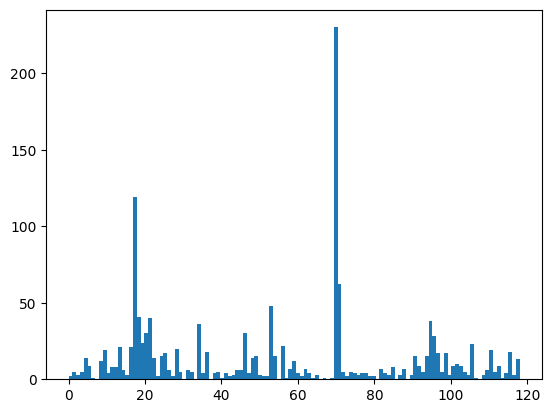

In [55]:
import matplotlib as plt
plt.figure(1)
plt.hist(y_true,bins=119)
plt.show() #可以看到类别分布很不均匀

# LSTM

In [41]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from collections import defaultdict
from vocab import Vocab
from utils import load_sentence

#tqdm是一个Python模块，能以进度条的方式显式迭代的进度
from tqdm.auto import tqdm

class LstmDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        return self.data[i]

def collate_fn(examples):
    # 获得每个序列的长度
    lengths = torch.tensor([len(ex[0]) for ex in examples])
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
    # 对batch内的样本进行padding，使其具有相同长度
    inputs = pad_sequence(inputs, batch_first=True)
    return inputs, lengths, targets

In [42]:
batch_size = 32
#加载数据

#train_data, test_data, vocab = load_sentence()
train_dataset = LstmDataset(train_data)
test_dataset = LstmDataset(test_data)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn, shuffle=False)


In [43]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_class):
        super(LSTM, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.output = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs, lengths):
        embeddings = self.embeddings(inputs)
        # pack_padded_sequence函数将变长序列打包
        # lengths.cpu()注意这里改为cpu，pytorch自身的问题
        x_pack = pack_padded_sequence(embeddings, lengths.cpu(), batch_first=True, enforce_sorted=False)
        hidden, (hn, cn) = self.lstm(x_pack)
        outputs = self.output(hn[-1])
        log_probs = F.log_softmax(outputs, dim=-1)
        return log_probs

In [45]:
embedding_dim = 128
hidden_dim = 256
num_class = 119
batch_size = 32
num_epoch = 1 #5
#加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTM(len(vocab), embedding_dim, hidden_dim, num_class)
model.to(device) #将模型加载到GPU中

#训练过程
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #使用Adam优化器

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch}"):
        inputs, lengths, targets = [x.to(device) for x in batch]
        log_probs = model(inputs, lengths)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

Training Epoch 0:   0%|          | 0/313 [00:00<?, ?it/s]

Loss: 1246.79


In [46]:
#测试过程
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
acc = 0
y_pred = np.array([]).astype(int)  #存储真实的target
y_true = np.array([]).astype(int)  #存储预测出来的target
for batch in tqdm(test_data_loader, desc=f"Testing"):
    inputs, lengths, targets = [x.to(device) for x in batch]
    #inputs, lengths, targets = [x for x in batch]
    with torch.no_grad():
        output = model(inputs, lengths)
        y_pred = np.append(y_pred,output.argmax(dim=1).cpu().numpy()) #要先把数据放在cpu上，才能转成numpy
        y_true = np.append(y_true,targets.cpu().numpy())
        acc += (output.argmax(dim=1) == targets).sum().item()

#输出在测试集上的准确率
print(f"Acc: {acc / len(test_data_loader):.2f}")
print(f"f1_macro:{f1_score(y_true,y_pred,average='macro'):.2f}")
print(f"f1_weighted:{f1_score(y_true,y_pred,average='weighted'):.2f}")
print(f"f1_macro:{f1_score(y_true,y_pred,average='macro'):.2f}")

Testing:   0%|          | 0/1425 [00:00<?, ?it/s]

Acc: 0.16
f1_macro:0.00
f1_weighted:0.05
f1_macro:0.00


# Transformer

In [1]:
import math
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from collections import defaultdict
from vocab import Vocab
from utils import load_sentence, length_to_mask
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# tqdm是一个Pyth模块，能以进度条的方式显式迭代的进度
from tqdm.auto import tqdm

class TransformerDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, i):
        return self.data[i]

def collate_fn(examples):
    lengths = torch.tensor([len(ex[0]) for ex in examples])
    inputs = [torch.tensor(ex[0]) for ex in examples]
    targets = torch.tensor([ex[1] for ex in examples], dtype=torch.long)
    # 对batch内的样本进行padding，使其具有相同长度
    inputs = pad_sequence(inputs, batch_first=True)
    return inputs, lengths, targets

batch_size = 32
# 加载数据
train_data, test_data, vocab = load_sentence()
train_dataset = TransformerDataset(train_data)
test_dataset = TransformerDataset(test_data)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn, shuffle=False)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ASUS\AppData\Local\Temp\jieba.cache
Loading model cost 0.653 seconds.
Prefix dict has been built successfully.


In [40]:
dataiter = iter(train_data_loader)
a = dataiter.next()
a[0].shape

torch.Size([32, 483])

In [14]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=512):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)  # 对偶数位置编码
        pe[:, 1::2] = torch.cos(position * div_term)  # 对奇数位置编码
        pe = pe.unsqueeze(0).transpose(0, 1)
        # pe是一个tensor对象，它被注册为模型的缓冲区，并且被命名为pe。这意味着在模型中可以通过self.pe来访问和使用这个缓冲区。缓冲区是一种特殊的tensor，它可以与模型的参数一起保存和加载，并且在模型的前向传播过程中不会被更新。即不对位置编码层求梯度。
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :] #输入的词向量与位置编码相加
        return x


In [41]:
positionEncoding = PositionalEncoding(128,0.1,512)
positionEncoding.pe.size()

torch.Size([512, 1, 128])

In [17]:
positionEncoding.pe[:342,:].size()

torch.Size([342, 1, 128])

In [56]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=512):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)  # 对偶数位置编码
        pe[:, 1::2] = torch.cos(position * div_term)  # 对奇数位置编码
        pe = pe.unsqueeze(0).transpose(0, 1)
        # pe是一个tensor对象，它被注册为模型的缓冲区，并且被命名为pe。这意味着在模型中可以通过self.pe来访问和使用这个缓冲区。缓冲区是一种特殊的tensor，它可以与模型的参数一起保存和加载，并且在模型的前向传播过程中不会被更新。即不对位置编码层求梯度。
        self.register_buffer('pe', pe)

    def forward(self, x):
        #print(x.size())
        #print(self.pe.size())
        #print(self.pe[:x.size(0), :].size())
        x = x + self.pe[:x.size(0), :] #输入的词向量与位置编码相加
        return x

class Transformer(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_class,
                 dim_feedforward=512, num_head=2, num_layers=2, dropout=0.1, max_len=3268, activation: str = "relu"):
        super(Transformer, self).__init__()
        # 词嵌入层
        self.embedding_dim = embedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = PositionalEncoding(embedding_dim, dropout, max_len)
        # 编码层：使用TransformerEncoder
        encoder_layer = nn.TransformerEncoderLayer(hidden_dim, num_head, dim_feedforward, dropout, activation)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        # 输出层
        self.output = nn.Linear(hidden_dim, num_class)


    def forward(self, inputs, lengths):
        #与LSTM处理情况一样，输入数据的第1维是批次，需要转换为TransformerEncoder，所需的第1维是长度，第2维是批次的形状
        inputs = torch.transpose(inputs, 0, 1)
        hidden_states = self.embeddings(inputs)
        hidden_states = self.position_embedding(hidden_states) 
        attention_mask = length_to_mask(lengths) == False  #根据批次中每个序列的长度生成Mask矩阵
        hidden_states = self.transformer(hidden_states, src_key_padding_mask=attention_mask)
        hidden_states = hidden_states[0, :, :] #第一个隐含层（代表整个序列）
        output = self.output(hidden_states)#取第一个标记的输出结果作为分类层的输入
        log_probs = F.log_softmax(output, dim=1)
        return log_probs


In [61]:
import torch, gc
embedding_dim = 128
hidden_dim = 128
num_class = 119
batch_size = 1 #32
num_epoch = 1

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Transformer(len(vocab), embedding_dim, hidden_dim, num_class)
model.to(device) # 将模型加载到GPU中（如果已经正确安装）

# 训练过程
nll_loss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # 使用Adam优化器

model.train()
for epoch in range(num_epoch):
    total_loss = 0
    for batch in tqdm(train_data_loader, desc=f"Training Epoch {epoch}"):
        inputs, lengths, targets = [x.to(device) for x in batch]
        #inputs, lengths, targets = [x for x in batch]
        
        gc.collect()
        torch.cuda.empty_cache()
        
        log_probs = model(inputs, lengths)
        loss = nll_loss(log_probs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Loss: {total_loss:.2f}")

RuntimeError: CUDA out of memory. Tried to allocate 38.00 MiB (GPU 0; 2.00 GiB total capacity; 863.74 MiB already allocated; 13.06 MiB free; 894.00 MiB reserved in total by PyTorch)